# Single cell fluorescence/holographic trajectory plotting

Designed to measure a series of time-dependent single cell fluorescent/holographic intensities and then plot them on comparative graphs


```
Author: 
- Nathan J. Day (nathan.day.16@ucl.ac.uk)
```


### STEPS
1. Measure the intenstities of the cell trajectories and save out as csv and pandas dataframe
2. Plot these trajectories 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import ndimage
from skimage import io
from sklearn import preprocessing

## Measure 

Read single cell mask information and obtain fluorescent and phase stats. If the data already exists in a .csv and just needs to be plotted then skip to the plotter section.

#### Raw data (image) location

The image data needs to be organised inside the ```root_dir``` as follows:

```
phase/
    0000_phase.tif
    0001_phase.tif
    ...
gfp/
    0000_gfp.tif
    0001_gfp.tif
    ...
rfp/
    0000_rfp.tif
    0001_rfp.tif
    ...
```
And the corresponding mask data needs to be organised inside the ```mask_version``` folder in the ```root_dir``` as follows:

```
singlecell_labels_gold/labels_cell1a
                            0000_mask.tif
                            0001_mask.tif
                            ...
singlecell_labels_gold/labels_cell2a
                            0000_mask.tif
                            0001_mask.tif
                            ...
singlecell_labels_gold/labels_cell...
```
where the ```singlecell_labels_gold = mask_type``` at the time of writing

In [4]:
root_path = "C:/Users/Nathan/Documents/data/fucci/"

gfp_dir = os.path.join(root_path, "gfp")
rfp_dir = os.path.join(root_path, "rfp")
phase_dir = os.path.join(root_path, "phase")

gfp_list = [m for m in os.listdir(gfp_dir) if m.endswith('.tif')]
rfp_list = [m for m in os.listdir(rfp_dir) if m.endswith('.tif')]
phase_list = [m for m in os.listdir(phase_dir) if m.endswith('.tif')]

cell_ids = ["1a", "1b", "2a", "2b", "3a", "3b", "4", "5"]
mask_type = "gold" #gold standard or modelv4, modelv5 etc
 

In [3]:
for cell in cell_ids:

    masks_dir_name = "labels_cell" + cell 
    masks_dir = os.path.normpath(os.path.join(root_path, "singlecell_labels_gold", masks_dir_name))
    mask_list = [m for m in os.listdir(masks_dir) if m.endswith('modified.tif')] # add something to include unmodified if modified doesnt exist?

    ### DIRECTORY CREATION ###
    stats_dir = os.path.join(root_path, 'stats') 
    try:
    # Create target Directory
        os.mkdir(stats_dir)
        print("Directory " , stats_dir ,  " Created ") 
    except FileExistsError:
        print("Directory " , stats_dir ,  " already exists")
    
    mask_type_stats_dir = os.path.join(stats_dir, mask_type) 
    try:
    # Create target Directory
        os.mkdir(mask_type_stats_dir)
        print("Directory " , mask_type_stats_dir ,  " Created ") 
    except FileExistsError:
        print("Directory " , mask_type_stats_dir ,  " already exists")    
            
    stat_file_dir = os.path.normpath(os.path.join(mask_type_stats_dir, "cell"+cell))
    try:
    # Create target Directory
        os.mkdir(stat_file_dir)
        print("Directory " , stat_file_dir ,  " Created ") 
    except FileExistsError:
        print("Directory " , stat_file_dir ,  " already exists")        
        #create target file
    stat_file = os.path.normpath(os.path.join(stat_file_dir, 'stats.csv'))
    
    df = pd.DataFrame([], columns=['GFP Intensity', 'RFP Intensity', 'Phase Intensity', 'Area', 'x','y']) #is this assignment of df correct? or does it overwrite "count_cells" above
   
    for i, mask_name in enumerate(mask_list):
        #useful for troubleshooting
        #print(i)
        #print(cell) 
        
        mask = io.imread(os.path.normpath(os.path.join(masks_dir, mask_name)))
        labelled, n_labels = ndimage.label(mask)
        
        gfp = io.imread(os.path.join(gfp_dir,gfp_list[i]))
        gfp_pix_value = ndimage.sum(gfp, labelled, 1) 
    
        rfp = io.imread(os.path.join(rfp_dir,rfp_list[i]))
        rfp_pix_value = ndimage.sum(rfp, labelled, 1)
        
        phase = io.imread(os.path.join(phase_dir,phase_list[i]))
        phase_pix_value = ndimage.sum(phase, labelled, 1)

        
        df.loc[i,'GFP Intensity'] = gfp_pix_value 
        df.loc[i,'RFP Intensity'] = rfp_pix_value
        df.loc[i,'Phase Intensity'] = phase_pix_value 
        df.loc[i,'Area'] = ndimage.sum(mask)
        #df.loc[i,'Max'] =  ndimage.maximum(phase, labelled)

        centroid = ndimage.measurements.center_of_mass(mask)
        y = centroid[0]
        x = centroid[1]
        df.loc[i,'x'] = format(x, '.2f')
        df.loc[i,'y'] = format(y, '.2f')
    
    df.to_csv(stat_file, index=False)  
    print(df)
print('FIN')    

Directory  C:/Users/Nathan/Documents/data/fucci/stats  already exists
Directory  C:/Users/Nathan/Documents/data/fucci/stats\gold  already exists
Directory  C:\Users\Nathan\Documents\data\fucci\stats\gold\cell1a  already exists


KeyboardInterrupt: 

### Load data
If the data already exists in a .csv and just needs to be plotted then skip to this part, **but make sure you uncomment then following cell!**

+ Number of cells
+ Number of frames/timepoints (length of trajectory)

##### At time of writing this the data organisation is as follows
Stats.csv:

|   |GFP Intensity|RFP Intensity|Phase Intensity|Area| x | y |
|---|-------------|-------------|---------------|----|---|---|
|1  |             |             |               |    |   |   |
|2  |             |             |               |    |   |   |
|...|             |             |               |    |   |   |
|t  |             |             |               |    |   |   |

And the directory organisation is as follows:

```
root_path/stats/mask_version/
                          cell1/stats.csv
                          cell2/stats.csv
                          ...
```
Where ```mask_version``` could be any of the following
```
mask_version = { /gold
                 /modelv4
                 /modelv5
                     ... } 
```

In [5]:
### Data location ###
root_path = "C:/Users/Nathan/Documents/data/fucci/stats/gold"
cell_ids = ["1a", "1b", "2a", "2b", "3a", "3b", "4", "5"]

In [6]:
def colour_picker(variable_title):
        colour_list = ["GFP", "RFP", "Phase"]
        for colour in colour_list:
            if colour in variable_title:
                if colour == "GFP": 
                    return 'green'
                elif colour == 'RFP':
                    return 'red'
                elif colour == 'Phase':
                    return 'gray'
                else:
                    return "Could not find a suitable colour to plot in, check colour_picker function"

def normalisation(series):
    max_series = np.amax(series)
    norm_factor = 1 / max_series
    scaled_series = series * norm_factor
    return scaled_series

### not sure im using this type of class correctly, but this maps cell_id to normalised_stats path location
class cell_id_stat_location:
    def __init__(self, cell_id, path):
        self.cell_id = cell_id
        self.path = path
        print("Initialised")
cell_info = [cell_id_stat_location("1a", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell1a\\normalised_stats.csv'), cell_id_stat_location("1b", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell1b\\normalised_stats.csv'), cell_id_stat_location("2a", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell2a\\normalised_stats.csv'), cell_id_stat_location("2b", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell2b\\normalised_stats.csv'), cell_id_stat_location("3a", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell3a\\normalised_stats.csv'), cell_id_stat_location("3b", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell3b\\normalised_stats.csv'), cell_id_stat_location("4", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell4\\normalised_stats.csv'), cell_id_stat_location("5", 'C:/Users/Nathan/Documents/data/fucci/stats/gold\\cell5\\normalised_stats.csv')] 

Initialised
Initialised
Initialised
Initialised
Initialised
Initialised
Initialised
Initialised


      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0           1626428        2675515        158340734  6617  126.20  919.11
1           1603424        2676191        153163572  6405  120.91  912.93
2           1685192        2827291        152809532  6467  116.03  908.11
3           1679822        2767949        148365747  6488  110.13  905.19
4           1725750        2819357        140716508  6701  110.19  901.96
...             ...            ...              ...   ...     ...     ...
1088         816369         962695         77659786  4295  236.57  912.03
1089         836339        1027816         75723442  4380  238.17  909.05
1090         852500        1022530         77152507  4514  236.15  910.80
1091         796198         971541         72829292  4128  239.86  911.97
1092         823866         996968         77499572  4375  237.70  910.66

[1093 rows x 6 columns]


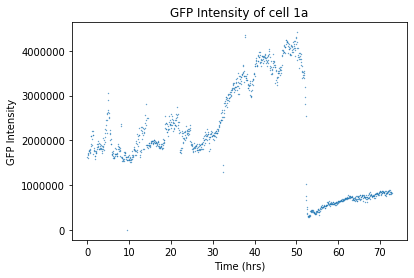

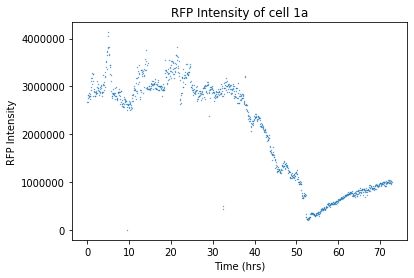

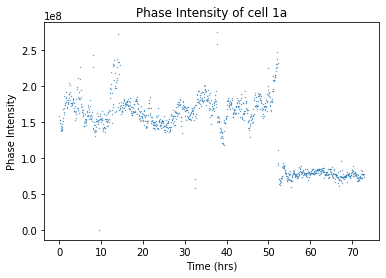

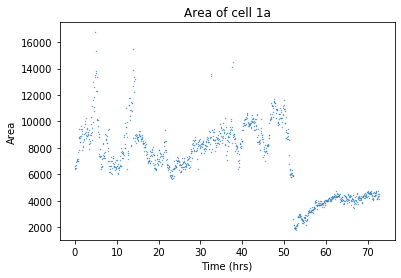

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0           1626428        2675515        158340734  6617  126.20  919.11
1           1603424        2676191        153163572  6405  120.91  912.93
2           1685192        2827291        152809532  6467  116.03  908.11
3           1679822        2767949        148365747  6488  110.13  905.19
4           1725750        2819357        140716508  6701  110.19  901.96
...             ...            ...              ...   ...     ...     ...
1088         919785        1142083         57269666  4740  229.47  834.32
1089         955335        1190954         56498901  5079  228.58  833.62
1090         863701        1120895         53273182  4384  231.05  835.54
1091         815355        1064263         52140354  4093  229.57  834.65
1092         951293        1177589         63401364  5056  228.68  834.58

[1093 rows x 6 columns]


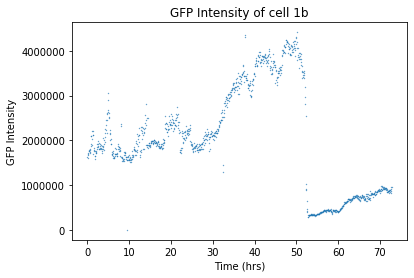

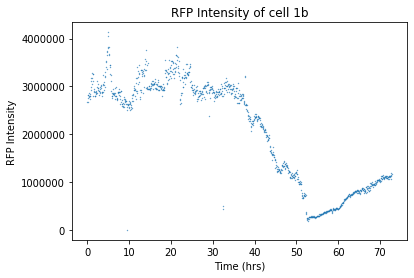

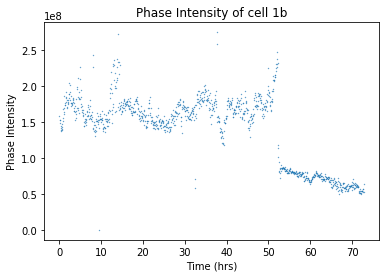

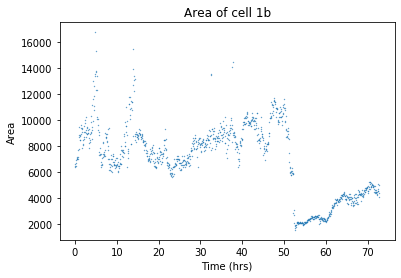

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            705824        1448011         97389328  2189  659.78  820.68
1            713476        1570728         93459965  2156  654.96  809.80
2            773139        1625135         94486890  2219  645.86  804.12
3            707516        1432542         88881280  2197  644.36  801.98
4            756764        1528403         89886912  2337  645.43  800.03
...             ...            ...              ...   ...     ...     ...
1088        1037839        1702581         61411471  5076  859.43  752.97
1089        1062267        1681892         61490224  5365  858.69  754.39
1090        1041744        1697261         66206931  5109  859.53  755.14
1091        1008243        1661764         60325326  4955  859.55  754.41
1092        1021051        1665868         62953939  5008  858.43  753.77

[1093 rows x 6 columns]


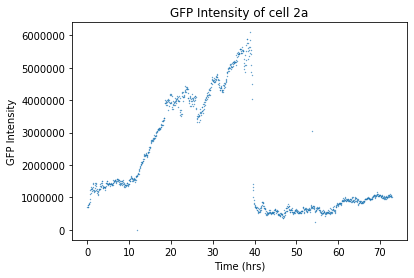

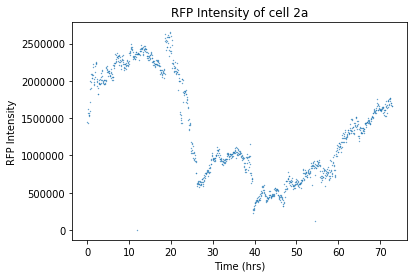

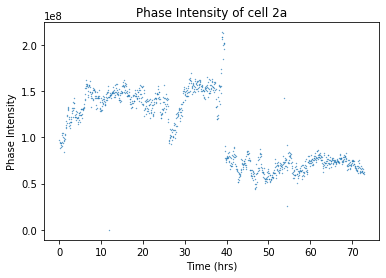

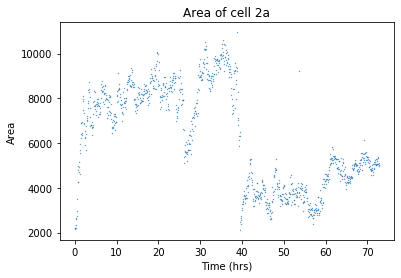

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            705824        1448011         97389328  2189  659.78  820.68
1            713476        1570728         93459965  2156  654.96  809.80
2            773139        1625135         94486890  2219  645.86  804.12
3            707516        1432542         88881280  2197  644.36  801.98
4            756764        1528403         89886912  2337  645.43  800.03
...             ...            ...              ...   ...     ...     ...
1088         419858         151893         40928717   830  830.15  688.82
1089         393977         148010         40913727   803  835.33  687.71
1090         397101         169783         45927939   927  836.07  692.61
1091         271834         119822         33148216   636  832.56  691.61
1092         284143         115922         33354206   636  832.56  691.61

[1093 rows x 6 columns]


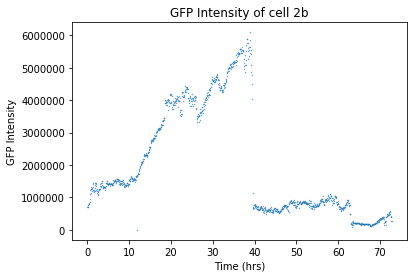

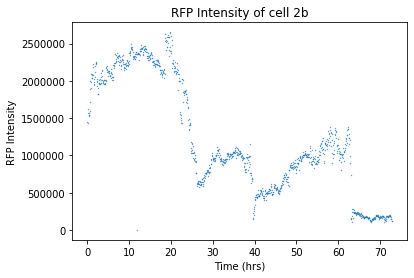

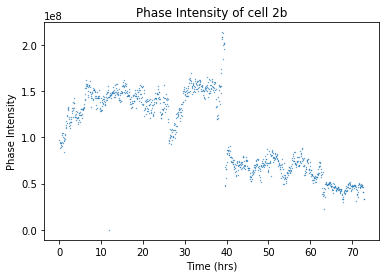

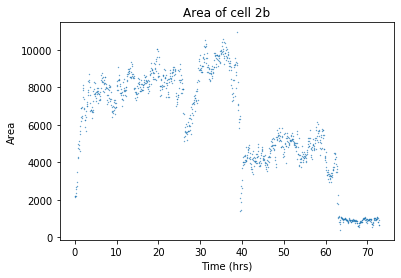

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            695053         811747         56327191  3162  153.56  773.97
1            711865         830127         58589548  3164  150.21  768.43
2            676752         817098         53879194  2849  147.37  764.97
3            851449         944887         67277522  3658  150.14  753.47
4            890468        1026472         63156896  3871  151.43  753.87
...             ...            ...              ...   ...     ...     ...
1088        1745998        1677016         47341693  4519  385.97  649.61
1089        1787502        1773613         54155328  4572  386.77  648.35
1090        1771567        1765795         45898643  4551  387.26  651.93
1091        1707283        1614537         43850024  4130  386.56  649.34
1092        1771397        1689366         49124995  4546  384.95  653.16

[1093 rows x 6 columns]


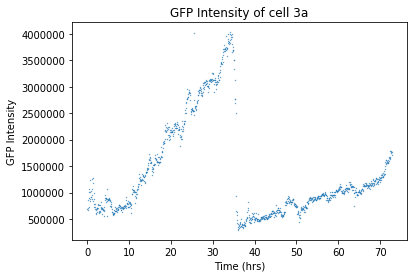

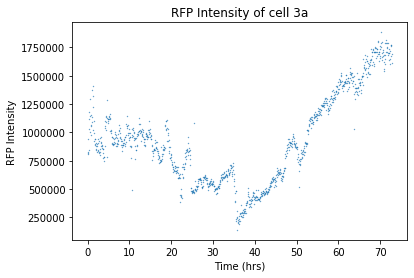

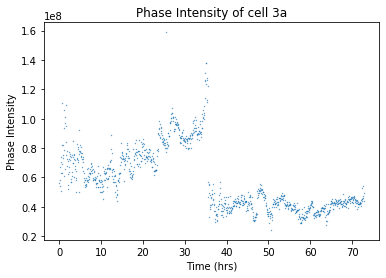

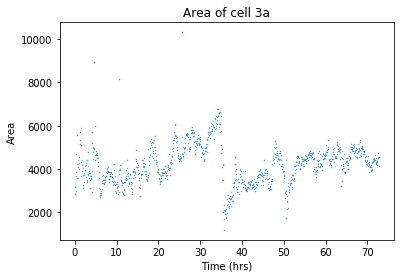

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            695053         811747         56327191  3162  153.56  773.97
1            711865         830127         58589548  3164  150.21  768.43
2            676752         817098         53879194  2849  147.37  764.97
3            851449         944887         67277522  3658  150.14  753.47
4            890468        1026472         63156896  3871  151.43  753.87
...             ...            ...              ...   ...     ...     ...
1088        1227233        2174076         67310206  4570  428.34  563.78
1089        1364307        2289191         78689142  5333  428.43  563.56
1090        1273005        2157226         64912835  4789  427.42  564.33
1091        1256881        2229690         64316877  4648  428.07  560.57
1092        1391371        2289218         71931756  5544  429.29  563.18

[1093 rows x 6 columns]


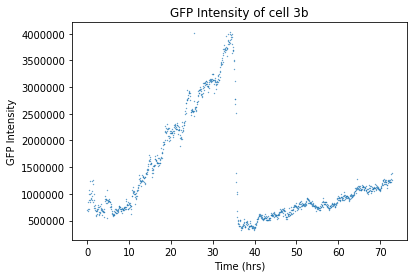

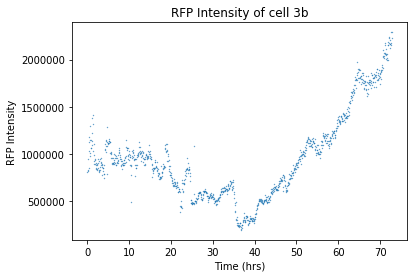

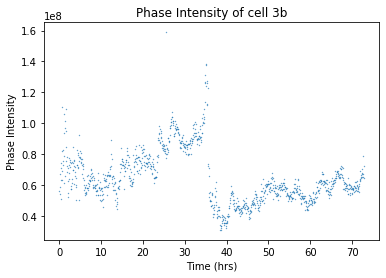

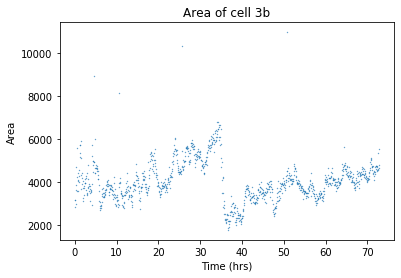

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            755180         872486         64807763  3685  208.14  678.33
1            820421         932860         65731697  3998  209.29  673.39
2            859936         982839         66787529  4025  200.47  666.43
3            704923         836836         51383875  3230  201.54  652.28
4            792436         953056         55209563  3691  195.50  642.16
...             ...            ...              ...   ...     ...     ...
1088        1158670        2053367         76174770  3769  469.67  634.73
1089        1175883        2118346         75680435  3872  470.08  633.13
1090        1304055        2328215         87675004  4537  470.38  634.50
1091        1290780        2208122         85986237  4418  471.29  631.21
1092        1174327        1996491         76414637  3889  471.47  632.26

[1093 rows x 6 columns]


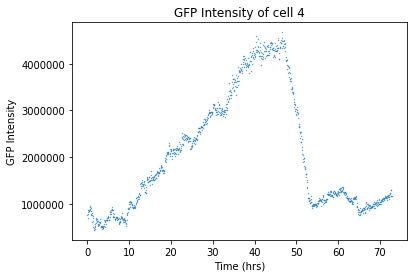

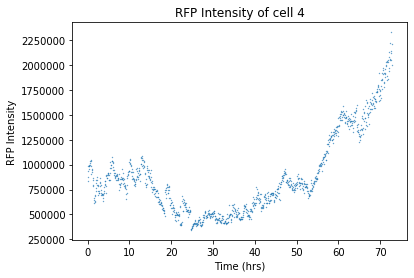

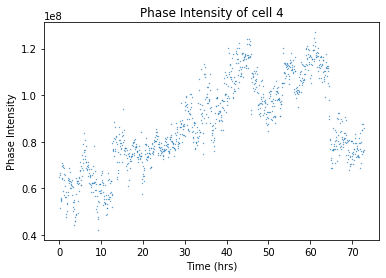

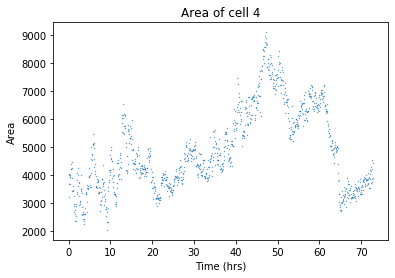

      GFP Intensity  RFP Intensity  Phase Intensity  Area       x       y
0            546781        1136027         50283118  2155   26.17   21.59
1            587692        1266533         52135723  2245   25.35   22.64
2            651649        1432238         51473395  2317   24.62   22.94
3            764152        1690368         52619002  2676   26.31   24.28
4            801235        1828941         53035963  2821   26.97   24.65
...             ...            ...              ...   ...     ...     ...
1088        2610604        5553665        144673416  7888  314.98  134.90
1089        2677101        5795902        143460955  8327  315.85  135.78
1090        2584391        5663316        141149673  7560  313.06  136.91
1091        2452040        5496006        126869036  6828  312.65  139.15
1092        2588544        5842108        129504316  7539  316.47  142.62

[1093 rows x 6 columns]


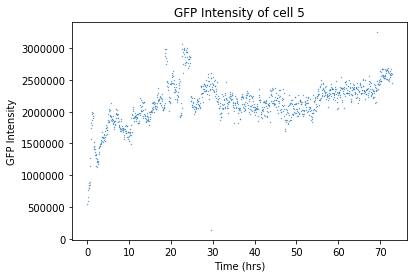

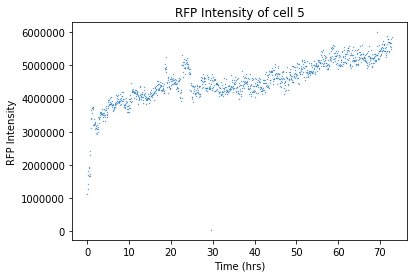

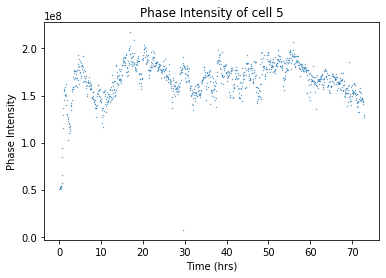

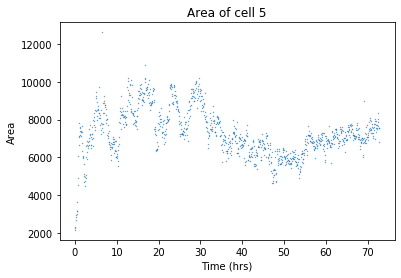

In [7]:
### Raw data plots 
for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))
    print(df)
    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

    y_variables = df.columns[0:4] #this calls just the first four variables 
    for y in y_variables:
        intensity = df[y]            
        plt.scatter(x_time,[intensity], s= 0.1)
        plt.ylabel(y)
        plt.xlabel('Time (hrs)')
        title = y + ' of cell ' + cell
        plt.title(title)
        plt.show()


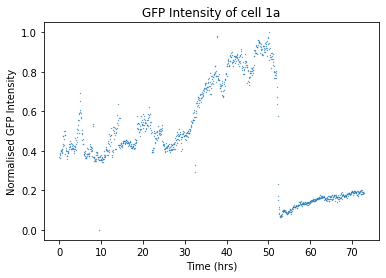

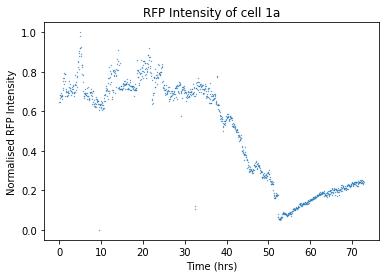

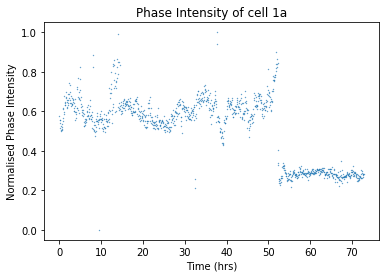

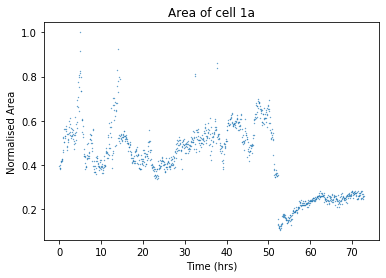

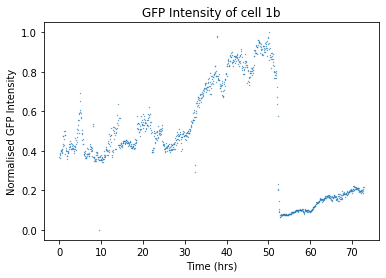

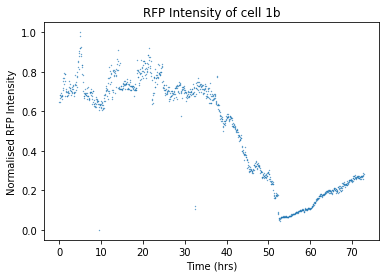

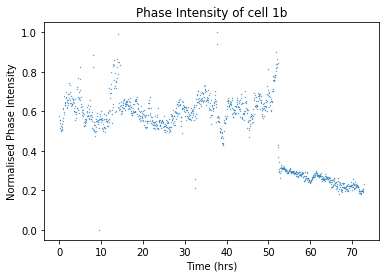

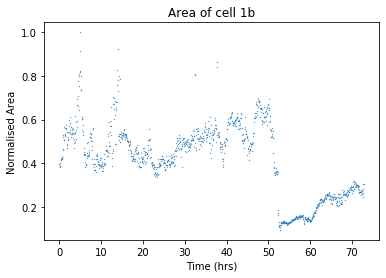

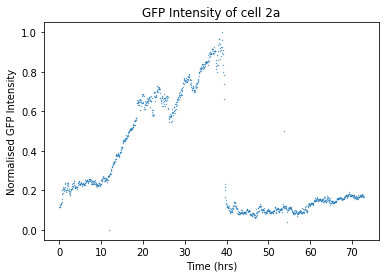

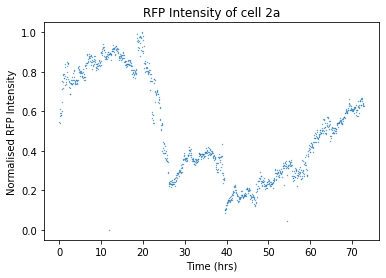

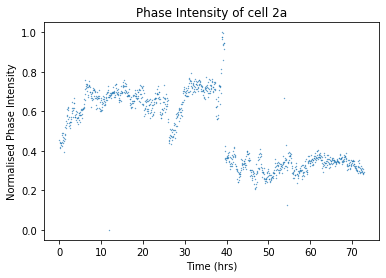

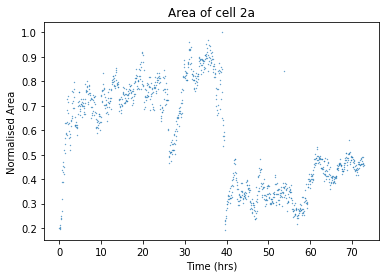

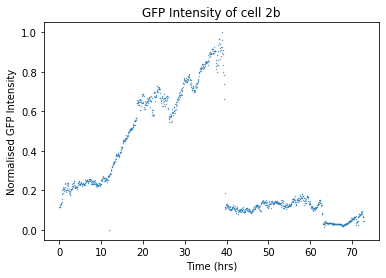

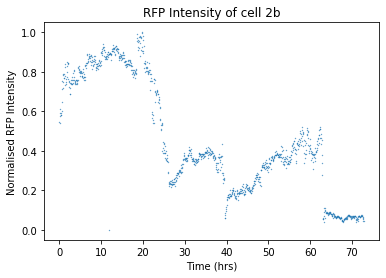

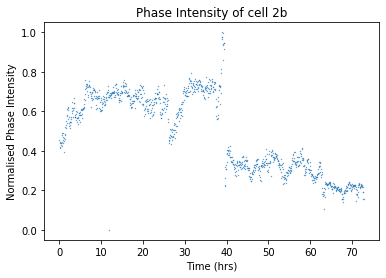

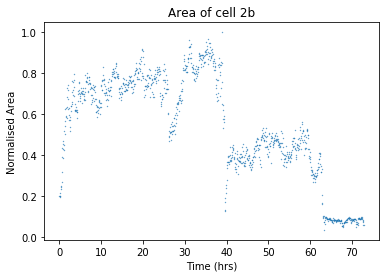

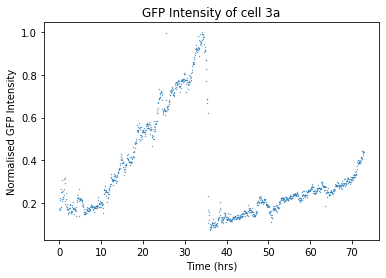

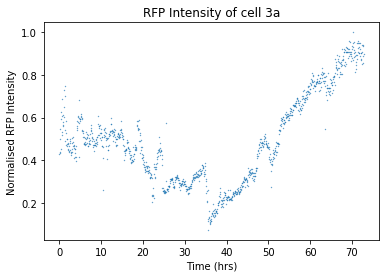

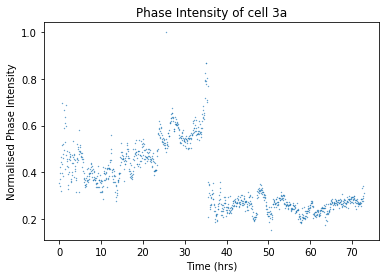

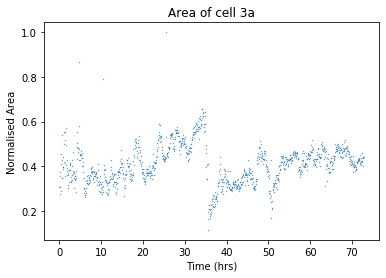

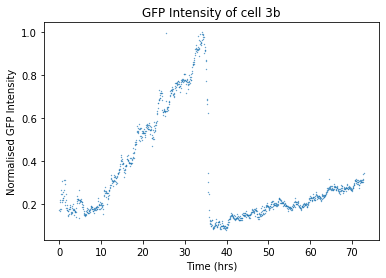

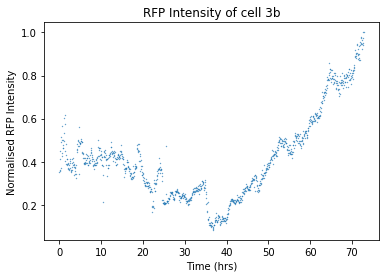

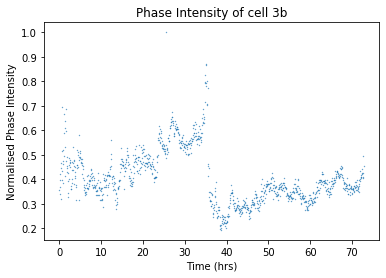

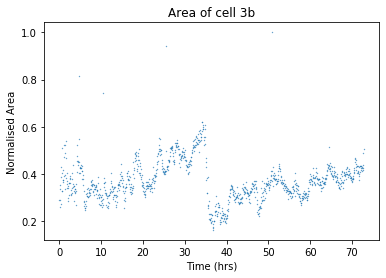

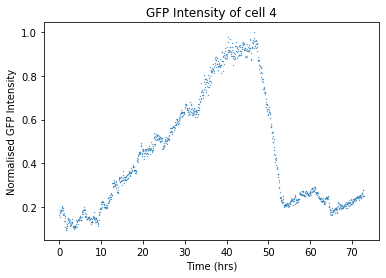

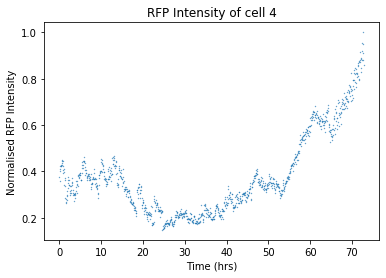

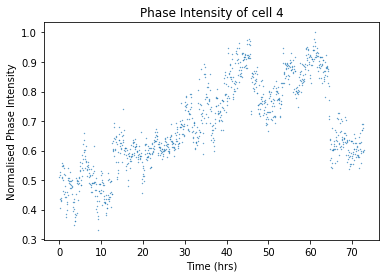

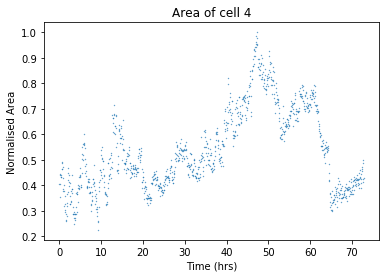

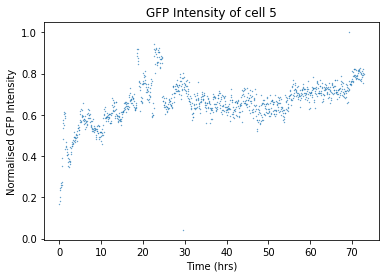

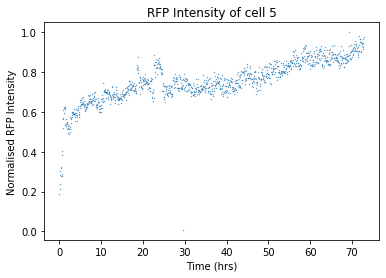

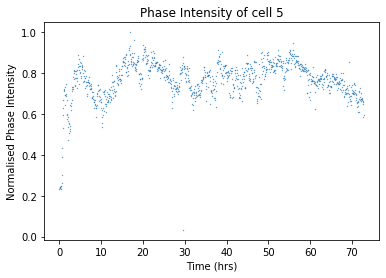

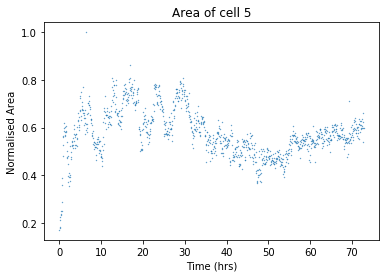

In [10]:
### Normalised data plots

for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins

    y_variables = df.columns[0:4] #this calls just the first four variables 
    for y in y_variables:
        #intensity = df[y] 
        norm_intensity = normalisation(df[y])      
        plt.scatter(x_time,[norm_intensity], s= 0.1)
        #plt.plot(x_time,[norm_intensity], s= 0.1)
        ylabel = "Normalised " + y
        plt.ylabel(ylabel)
        plt.xlabel('Time (hrs)')
        title = y + ' of cell ' + cell
        plt.title(title)
        plt.show()

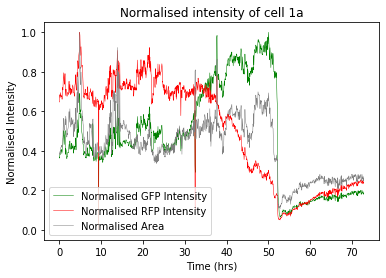

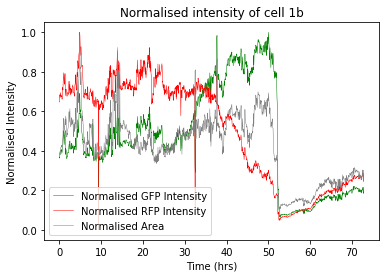

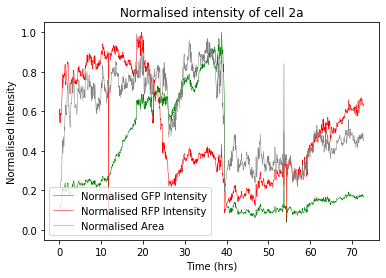

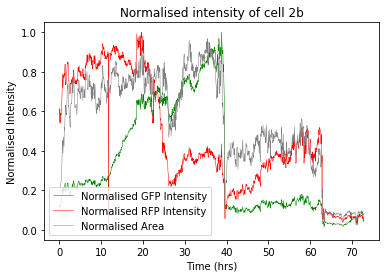

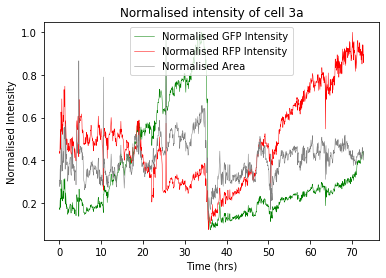

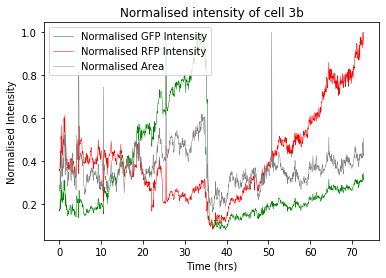

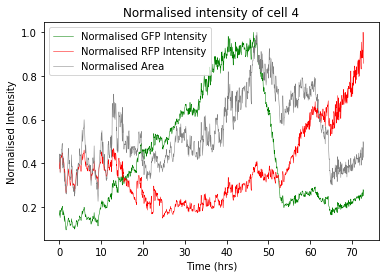

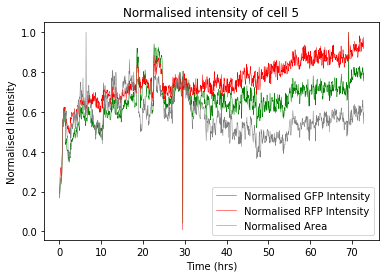

In [23]:
### Overlaid normalised plots 

for cell in cell_ids:
    cell_id = "cell" + cell
    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))
    norm_df = pd.DataFrame([])

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins
    
    # collect different intensities to plot
    for y in y_variables:
            #intensity = df[y] 
            y_name = 'Normalised ' + y
            norm_intensity = normalisation(df[y]) 
            norm_df[y_name] = norm_intensity   
    
    #plotting intensities on same plot
    for column in norm_df.columns[0:2]: #index in df.columns indicate variables to plot
        colour = colour_picker(column)
        plt.plot(x_time, norm_df[column], linewidth=0.5, color=colour, label = column)
    plt.plot(x_time, norm_df["Normalised Area"], linewidth=0.5, color="gray", label = "Normalised Area" )
    plt.ylabel("Normalised Intensity")
    plt.xlabel('Time (hrs)')
    plt.legend()
    title = "Normalised intensity of cell " + cell
    #title = norm_df.columns[0]+", "+ norm_df.columns[1]+ ", "+ norm_df.columns[2]+" of cell " + cell
    plt.title(title)
    save_title = title + ".png"
    plt.savefig(os.path.join(root_path, cell_id, save_title), dpi=1000)
    plt.show()       

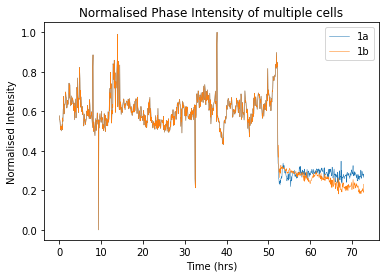

In [53]:
# overlaid multicell plots, alignment needed
norm_df = pd.DataFrame([])
norm_df_list = []
cell_ids = ["1a", "1b"]
for cell in cell_ids:
    cell_id = "cell" + cell

    stat_location = os.path.join(cell_id, "stats.csv")

    df = pd.read_csv(os.path.join(root_path, stat_location))

    x = df.index
    x_time = df.index * 4/60 #for plotting the x axis as hours assuming time period between frames is 4mins
    
    # collect different intensities to plot
    for y in y_variables:
            #intensity = df[y] 
            y_name = 'Normalised ' + y
            norm_intensity = normalisation(df[y]) 
            norm_df[y_name] = norm_intensity
    
    stat_location = os.path.join(cell_id, "normalised_stats.csv")
    norm_stat_file = os.path.join(root_path, stat_location)
    norm_df.to_csv(norm_stat_file, index=False)
    norm_df_list.append(norm_stat_file)
    
#need to edit these dataframes and and align them so that norm_df[i].min is all aligned 
for i, cell in enumerate(cell_ids):
    norm_df = pd.read_csv(cell_info[i].path)
    #now shift index of df so that the three column variables align
    shift1a = 0 
    shift2a = 0
    shift = 0 #amount to shift the df by
    norm_df.shift(periods=shift)

    
# for each channel
for column in norm_df.columns[2:3]: #only showing PHASE atm
    #for each cell
    for i, cell in enumerate(cell_ids):
        #print(cell)
        norm_df = pd.read_csv(cell_info[i].path)
        #colour = colour_picker(column)
        plt.plot(x_time, norm_df[column], linewidth=0.5, label = cell)#, color=colour)

    plt.ylabel("Normalised Intensity")
    plt.xlabel('Time (hrs)')
    title = column+ " of multiple cells"
    plt.title(title)
    plt.legend()
    save_title = title + ".png"
    plt.savefig(os.path.join(root_path, save_title), dpi=1000)
    plt.show()   

In [15]:
for i, cell in enumerate(cell_ids):

    norm_df = pd.read_csv(cell_info[i].path)

    differences_df = norm_df.diff(periods=50)
    align_point = differences_df["Normalised GFP Intensity"].idxmin(axis=0) ##calculates the largest drop in gfp for alignment
    
    align_dict[cell] = align_point
    index = i+1 
    #print(len(cell_ids))
    #if i+1 > int(cell_ids[-1]):
    if i+1 > len(cell_ids)-1:
        break
    else:
        shift_amount = align_dict[cell_ids[i]] - align_dict[cell_ids[i+1]]
    print(shift_amount)
    #shift = 0 #amount to shift the df by
    #shift_df = norm_df.shift(periods=align_point)

    #plt.scatter(x_time,[shift_df["Normalised GFP Intensity"]], s= 0.1)
    #plt.show()
print(align_dict)

NameError: name 'align_dict' is not defined

In [ ]:
#attempt at 3d plot

